# Exercise 1

## Supervised Learning- Regression Models


---

## Overview

Welcome to this exercise. We are now going to use our new skills to build our supervised learning models that use a regression approach.

---

Let's start by upgrading the `yfinance` module to the latest version. Run the following code block to upgrade it, then click the menu item at the top: **Kernel** > **Restart**, before running the remaining code blocks.

In [2]:
!pip install --upgrade yfinance

We also need to install `lxml` since we will be working with an XML document and `statmodels` to work with statistical models (no need to restart the kernel after running this command, since we're not upgrading).


In [4]:
!pip install lxml

In [5]:
!pip install statsmodels

In [6]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [7]:
# Retrieve historical price data.
# - Use the 'create_hist_prices()' function from 'func_lib' to get historical price data.
# - Assign the result to the variable 'historical_prices'.

historical_prices = func_lib.create_hist_prices()

# Define the list of momentum periods.
# - Create a list containing different time periods for calculating momentum indicators.
# - Assign this list to the variable 'list_of_momentums'.

list_of_momentums = [1, 5, 15, 20]

# Compute returns based on historical prices and momentum periods.
# - Use the 'compute_returns()' function from 'func_lib' with 'historical_prices' and 'list_of_momentums' as inputs.
# - Assign the result to the variable 'total_returns'.

total_returns = func_lib.compute_returns(historical_prices, list_of_momentums)

# Remove any rows with missing values from the returns data.
# - Use the 'dropna()' method to remove rows with NaN values from 'total_returns'.
# - Apply the change in place to modify the DataFrame directly.

total_returns.dropna(inplace=True)


[*********************100%***********************]  501 of 501 completed

1 Failed download:
['SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2024-05-01) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1714536000")')


In [8]:
# Determine the split index for 70% of the dates.
# - Extract the unique dates from the index of 'total_returns'.
# - Calculate the split date by indexing into the unique dates to get the date corresponding to 70% of the total length of unique dates.
# - Assign this date to the variable 'split_date' and display it.

unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
print(split_date)


2017-01-20 00:00:00


In [9]:
# Create the training set: all data before the split date.
# - Use the 'loc[]' indexer to select rows from 'total_returns' where the date in the index is earlier than 'split_date'.
# - Assign this subset of data to the variable 'train_data'.
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]


# Create the testing set: all data from the split date onwards.
# - Use the 'loc[]' indexer to select rows from 'total_returns' where the date in the index is equal to or later than 'split_date'.
# - Assign this subset of data to the variable 'test_data'.
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

test_data.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2017-01-20      -0.004830    -0.000420    -0.018549      0.044573   
       2017-01-23      -0.000844    -0.004830    -0.026700      0.038343   
       2017-01-24       0.022387    -0.000844    -0.020074      0.039289   
       2017-01-25      -0.004958     0.022387     0.003316      0.041299   
       2017-01-26       0.009965    -0.004958     0.011125      0.022718   

                   20_d_returns  
Ticker Date                      
A      2017-01-20      0.033497  
       2017-01-23      0.032302  
       2017-01-24      0.033002  
       2017-01-25      0.050870  
       2017-01-26      0.038690

In [10]:
# Extract the target variable for testing.
# - Select the 'F_1_d_returns' column from the 'test_data' DataFrame.
# - Assign this column to the variable 'total_returns'.
total_returns = test_data['F_1_d_returns']
total_returns.head()


Ticker  Date      
A       2017-01-20   -0.004830
        2017-01-23   -0.000844
        2017-01-24    0.022387
        2017-01-25   -0.004958
        2017-01-26    0.009965
Name: F_1_d_returns, dtype: float64

In [11]:
# Define the feature and target columns.
# - List the names of the feature columns in 'features'.
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
# - List the name of the target column in 'target'.
target = ['F_1_d_returns']


# Split the data into training and testing sets.
# - Extract the feature columns from 'train_data' and 'test_data' to create 'X_train' and 'X_test'.
X_train = train_data[features]
print(X_train)
X_test = test_data[features]
# - Extract the target column from 'train_data' and 'test_data' to create 'y_train' and 'y_test'.
y_train = train_data[target]
y_test = test_data[target]


                   1_d_returns  5_d_returns  15_d_returns  20_d_returns
Ticker Date                                                            
A      2000-02-01     0.072711     0.048938      0.029919     -0.013889
       2000-02-02     0.077465     0.119854      0.125000      0.150376
       2000-02-03     0.016340     0.136073      0.166979      0.246493
       2000-02-04    -0.019293     0.120294      0.127541      0.270833
       2000-02-07     0.042623     0.201134      0.162706      0.223077
...                        ...          ...           ...           ...
ZTS    2017-01-12     0.001501    -0.010013      0.005462      0.045838
       2017-01-13     0.006555    -0.006654      0.011672      0.057042
       2017-01-17    -0.009676    -0.013531     -0.000751      0.017202
       2017-01-18     0.003483    -0.009728     -0.006966      0.018020
       2017-01-19     0.003752     0.005548     -0.002127      0.023206

[1783882 rows x 4 columns]


In [12]:
# Standardize the features.
# - Create an instance of 'StandardScaler' for scaling the features.
# - Fit the scaler to the training data and transform both the training and testing feature sets.
# - Convert the scaled arrays back to DataFrames with the same index and column names as the original feature sets.
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

print(X_train[:5])
print(X_train_scaled[:5])

                   1_d_returns  5_d_returns  15_d_returns  20_d_returns
Ticker Date                                                            
A      2000-02-01     0.072711     0.048938      0.029919     -0.013889
       2000-02-02     0.077465     0.119854      0.125000      0.150376
       2000-02-03     0.016340     0.136073      0.166979      0.246493
       2000-02-04    -0.019293     0.120294      0.127541      0.270833
       2000-02-07     0.042623     0.201134      0.162706      0.223077
                   1_d_returns  5_d_returns  15_d_returns  20_d_returns
Ticker Date                                                            
A      2000-02-01     2.965371     0.863996      0.223651     -0.271582
       2000-02-02     3.161215     2.213451      1.305314      1.347408
       2000-02-03     0.643154     2.522092      1.782881      2.294736
       2000-02-04    -0.824756     2.221829      1.334226      2.534629
       2000-02-07     1.725898     3.760137      1.734261      2

In [13]:
# Add a constant to the model (intercept).
# - Use 'sm.add_constant()' to add a column of ones to the scaled feature sets for both training and testing data.
# - This column represents the intercept term in the regression model.

X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model.
# - Create an Ordinary Least Squares (OLS) regression model using 'sm.OLS()' with the scaled training features and the target variable.
# - Fit the model to the training data.

model = sm.OLS(y_train, X_train_scaled_const_add).fit()

# Print the model summary.
# - Use 'model.summary()' to output the regression results, including coefficients, R-squared, and other statistical metrics.

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          F_1_d_returns   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     693.6
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:29:57   Log-Likelihood:             4.1036e+06
No. Observations:             1783882   AIC:                        -8.207e+06
Df Residuals:                 1783877   BIC:                        -8.207e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0007   1.82e-05     40.039   

In [14]:
# Set the model name.
# - Assign the name 'Reg' to the variable 'model_name' to label the regression model.
model_name = 'Reg'

# Make predictions using the fitted model.
# - Use 'model.predict()' to generate predictions based on the scaled testing features with the added constant.
y_pred = model.predict(X_test_scaled_const_add)
# - Convert the true target values 'y_test' and predicted values 'y_pred' to DataFrames.
# - Rename the column in 'y_pred_df' to match the model name.

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0: model_name}, inplace=True)

# Combine the actual and predicted values into one DataFrame.
# - Use 'pd.merge()' to merge 'y_pred_df' with 'total_returns' on their index.
# - This combines the predicted values with the actual returns data.

y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)
y_test_and_pred.head()

Reg  F_1_d_returns
Ticker Date                               
A      2017-01-20  0.000889      -0.004830
       2017-01-23  0.001059      -0.000844
       2017-01-24  0.000942       0.022387
       2017-01-25  0.000530      -0.004958
       2017-01-26  0.000665       0.009965

In [15]:
# Define a trading strategy based on logistic regression predictions.
# - Create a function 'trading_strategy' that takes the predicted value 'y_pred' as input.
# - If the predicted value is greater than 0, return 1 (indicating a "Go long" signal).
# - Otherwise, return 0 (indicating no action or "Do nothing").
def trading_strategy(y_pred):
    return 1 if y_pred > 0 else 0


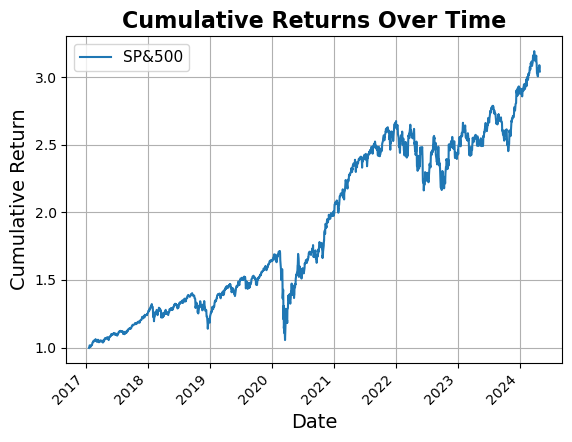

The CAGR is: 16.43%
Sharpe Ratio of Strategy: 0.87


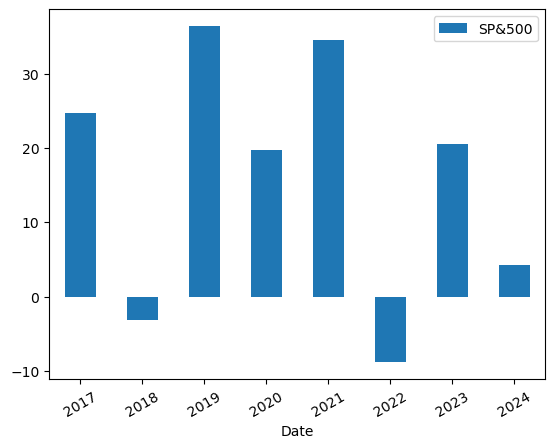

In [16]:
# Compute performance metrics based on the predictions and actual returns.
# - Use the 'func_lib.compute_BM_Perf()' function to calculate cumulative and calendar returns.
# - Pass the DataFrame 'y_test_and_pred' containing the actual and predicted values as an argument.
cum_returns, calendar_returns = func_lib.compute_BM_Perf(y_test_and_pred)


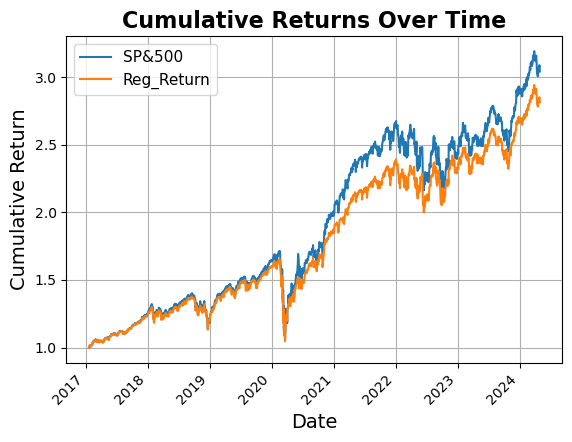

The CAGR is: 15.2%
Sharpe Ratio of Strategy: 0.9


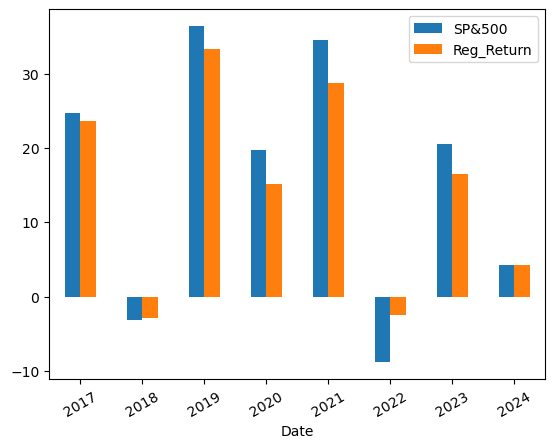

In [17]:
# Compute strategy performance metrics.
# - Use the 'func_lib.compute_strat_perf()' function to calculate the performance of the trading strategy.
# - Pass the following arguments:
#   - 'y_test_and_pred': The DataFrame containing actual and predicted values.
#   - 'cum_returns': Cumulative returns calculated previously.
#   - 'calendar_returns': Calendar returns calculated previously.
#   - 'trading_strategy': The function defining the trading strategy based on predictions.
#   - 'model_name': The name of the model to include in the performance evaluation.
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

